In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [29]:
df1=df.copy()

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [31]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [32]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [33]:
df1.Urban.replace(('No','Yes'),(0,1),inplace=True)

In [34]:
df1.US.replace(('No','Yes'),(0,1),inplace=True)

In [35]:
df1.ShelveLoc.replace(('Bad','Medium','Good'),(0,1,2),inplace=True)

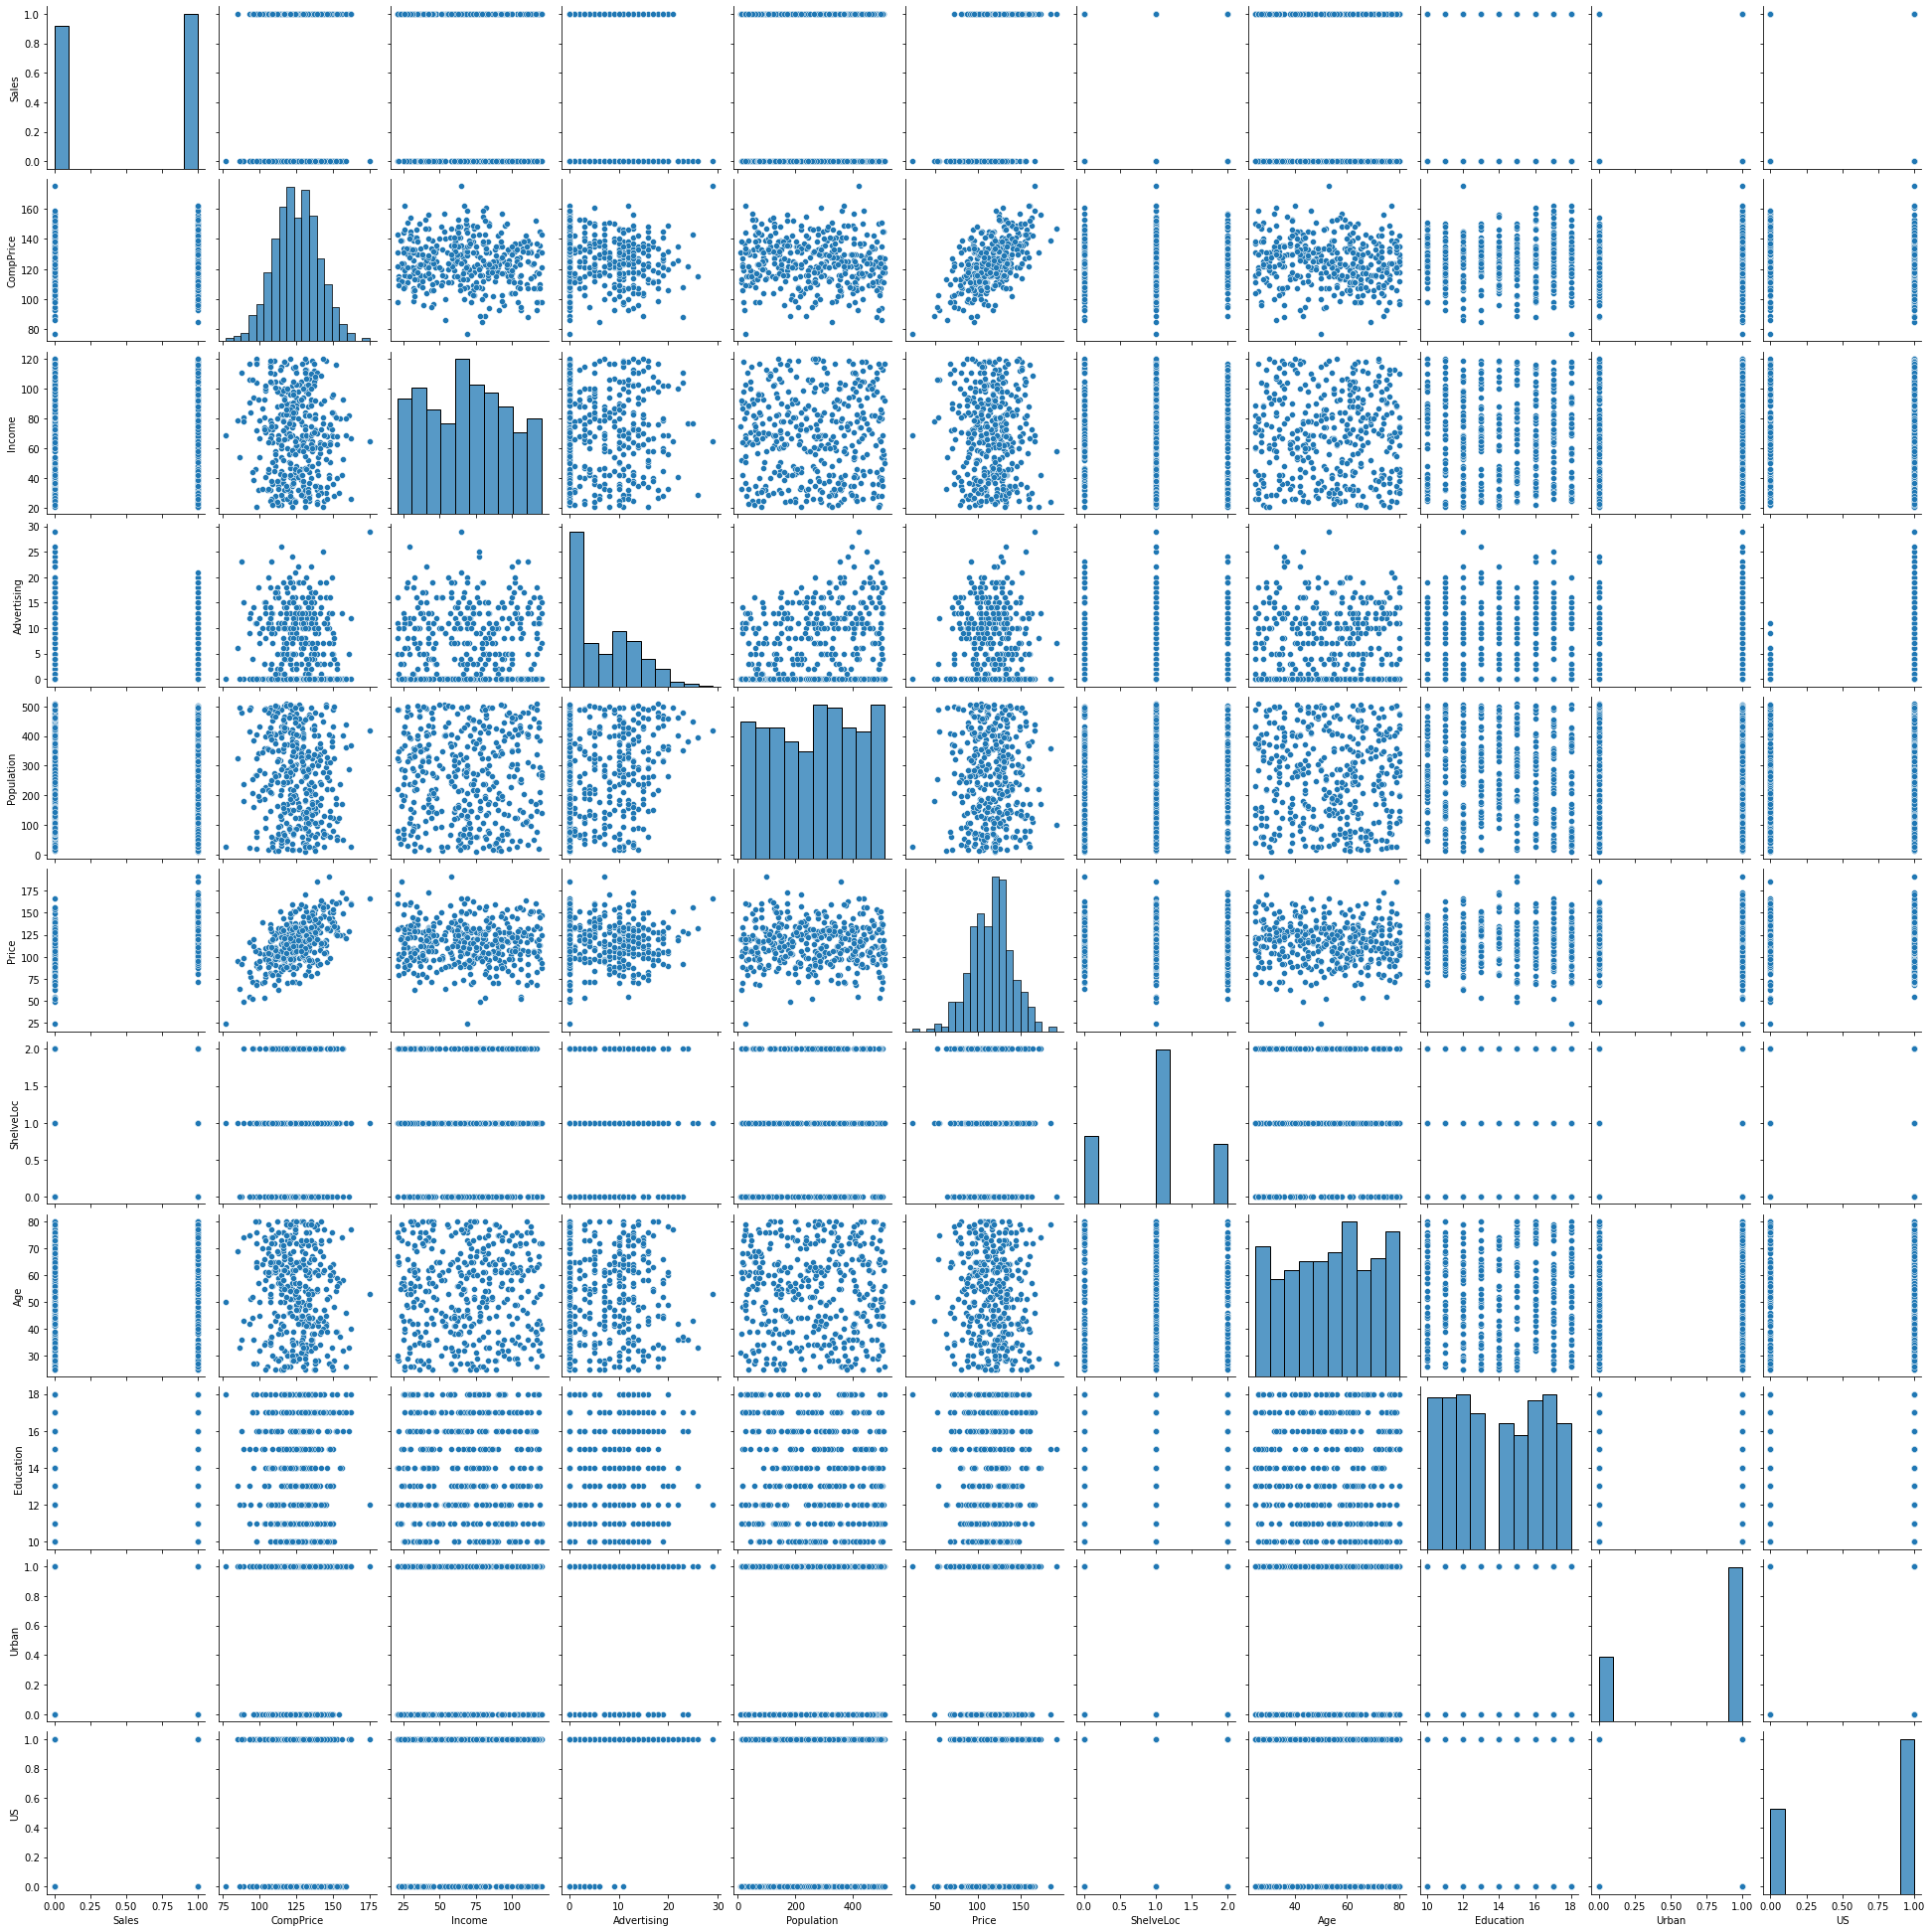

In [67]:
sns.pairplot(df1)

In [36]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [37]:
X=df1.drop(['Sales'],axis=True)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [45]:
y=df1['Sales']
y

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
395    0.0
396    1.0
397    1.0
398    1.0
399    0.0
Name: Sales, Length: 400, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [41]:
y_train.mean()

7.568031249999997

In [42]:
df1.loc[df1['Sales']<y_train.mean(),'Sales']=1

In [43]:
df1.loc[df1['Sales']>y_train.mean(),'Sales']=0

In [44]:
df1.head(40)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.0,138,73,11,276,120,0,42,17,1,1
1,0.0,111,48,16,260,83,2,65,10,1,1
2,0.0,113,35,10,269,80,1,59,12,1,1
3,1.0,117,100,4,466,97,1,55,14,1,1
4,1.0,141,64,3,340,128,0,38,13,1,0
5,0.0,124,113,13,501,72,0,78,16,0,1
6,1.0,115,105,0,45,108,1,71,15,1,0
7,0.0,136,81,15,425,120,2,67,10,1,1
8,1.0,132,110,0,108,124,1,76,10,0,0
9,1.0,132,113,0,131,124,1,76,17,0,1


In [49]:
from sklearn import preprocessing
lc=preprocessing.LabelEncoder()
df1['Sales']=lc.fit_transform(df1['Sales'])

In [50]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,2,65,10,1,1
2,0,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [65]:
import warnings
warnings.filterwarnings('ignore')

array=df1.values
x = array[:,1:]
Y = array[:,:1]
num_trees = 97
max_features = 10
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, Y, cv=kfold)
print(results.mean())

0.8350000000000002


In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [66]:
array = df1.values

x = array[:,1:]
Y = array[:,:1]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, Y, cv=kfold)
print(results.mean())

0.8275


In [ ]:
|